In [1]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle
# -- libraries added by chris-- #
import timeit
import jinja2
# -- #
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

2. color palete

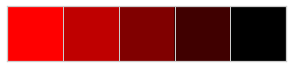

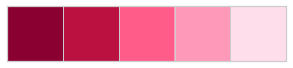

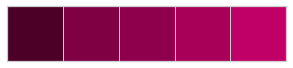

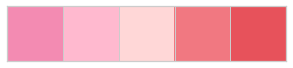

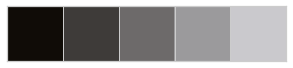

In [2]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

*3. import and read dataset

In [3]:
# --- Importing Dataset ---
df = pd.read_csv("D:/Documents/4B/BME499/github/BME499Project/datasets/heart.csv")

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


print dataset

In [4]:

# --- Fix Data Types ---
#Cholesterol, fasting BS and excercise Angina are deleted
df.drop('Cholesterol', inplace = True, axis = 1)
df.drop('FastingBS', inplace = True, axis = 1)
df.drop('ExerciseAngina',inplace = True, axis = 1)
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 918
Total Columns: 9
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            918 non-null    int64  
 1   Sex            918 non-null    object 
 2   ChestPainType  918 non-null    object 
 3   RestingBP      918 non-null    int64  
 4   RestingECG     918 non-null    object 
 5   MaxHR          918 non-null    int64  
 6   Oldpeak        918 non-null    float64
 7   ST_Slope       918 non-null    object 
 8   HeartDisease   918 non-null    int64  
dtypes: float64(1), int64(4), object(4)

**5. Initial Data Exploration**
 
 5.1 Categorical Variables

    5.1.1 Sex distribution

*************************
.: Sex (Gender) Total :.
*************************


M    725
F    193
Name: Sex, dtype: int64

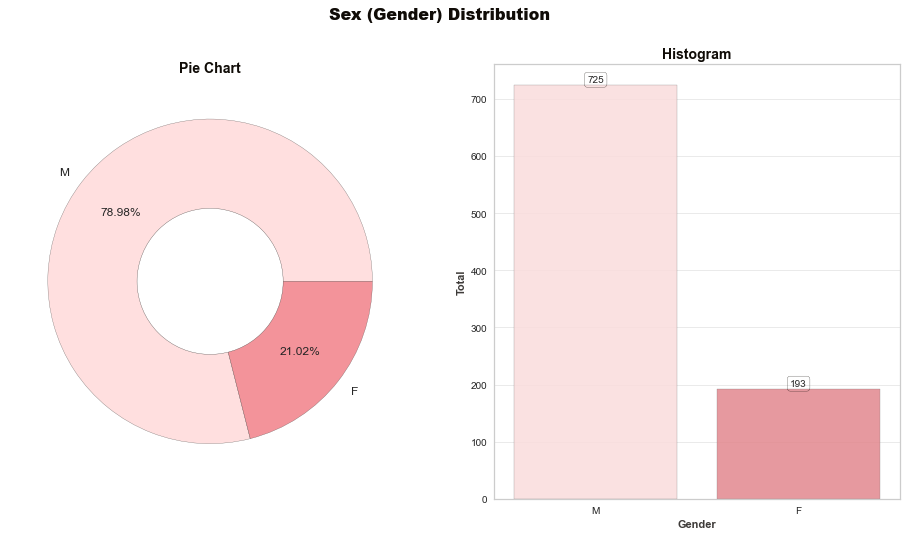

In [5]:

# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['M','F']
order=df['Sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.Sex.value_counts(dropna=False)


5.1.2 chest pain type

******************************
.: Chest Pain Type Total :.
******************************


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

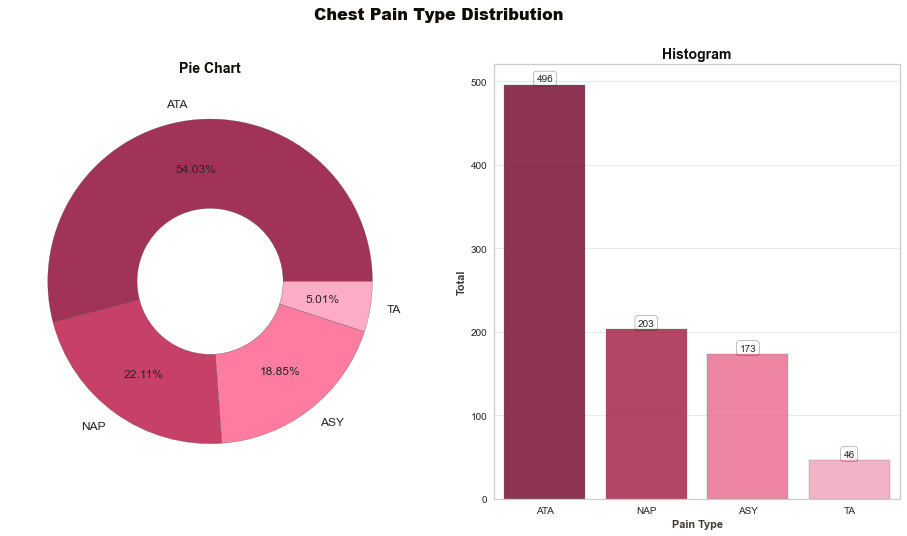

In [6]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['ATA', 'NAP', 'ASY', 'TA']
order=df['ChestPainType'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['ChestPainType'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ChestPainType', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.ChestPainType.value_counts(dropna=False)

5.1.3 rest ECG type

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

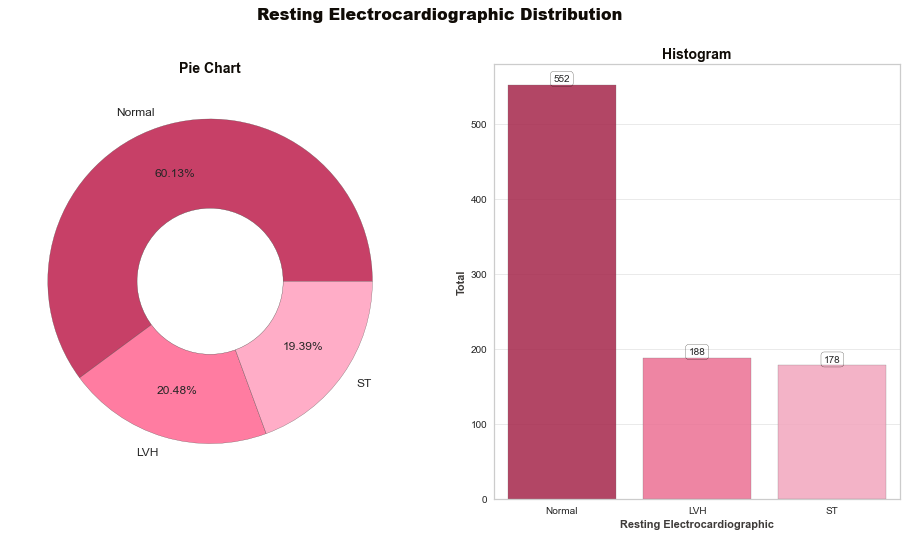

In [7]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['Normal', 'LVH', 'ST']
order=df['RestingECG'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['RestingECG'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='RestingECG', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.RestingECG.value_counts(dropna=False)

5.1.4 ST slope distribution

********************
.: Slope Total :.
********************


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

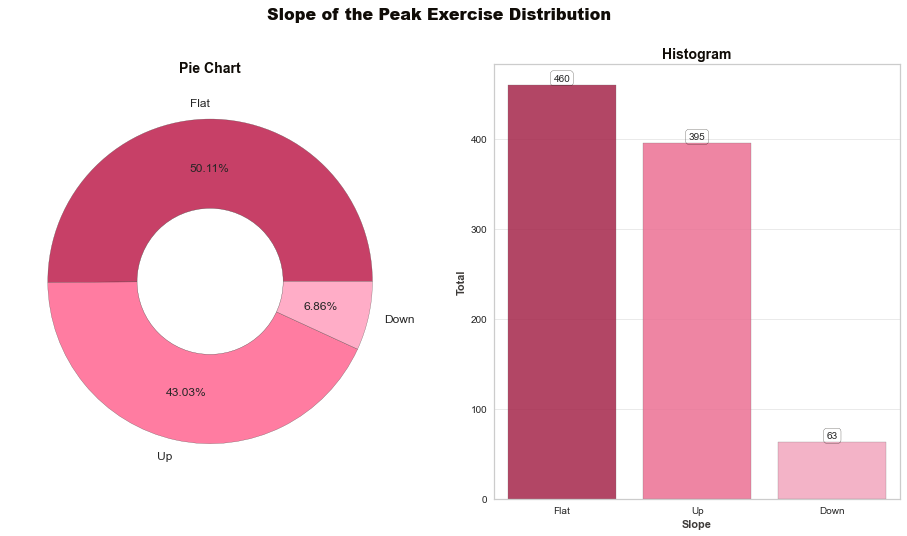

In [8]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['Flat', 'Up', 'Down']
order=df['ST_Slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['ST_Slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ST_Slope', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.ST_Slope.value_counts(dropna=False)

5.1.5 Heart Disease (target)

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


1    508
0    410
Name: HeartDisease, dtype: int64

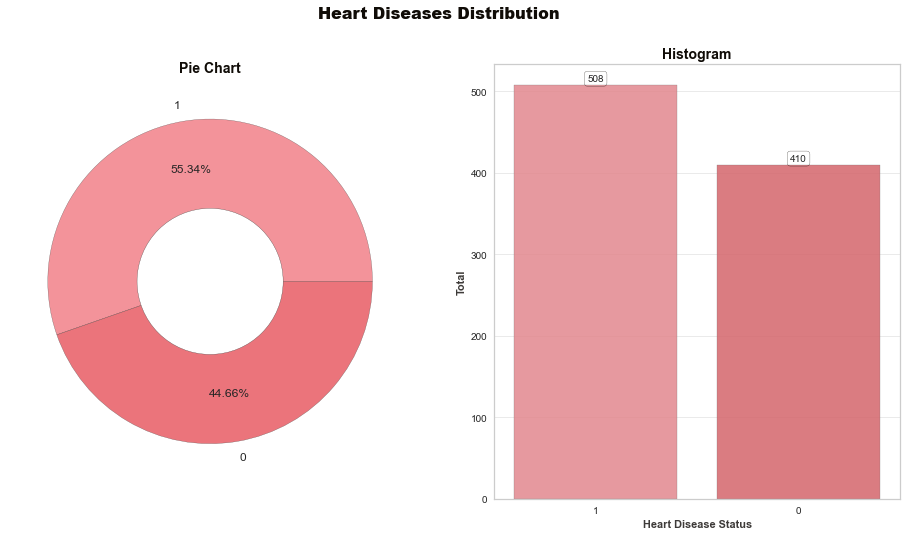

In [9]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['1', '0']
order=df['HeartDisease'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['HeartDisease'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='HeartDisease', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.HeartDisease.value_counts(dropna=False)

**5.2 Numerical Variable**

5.2.1 Descriptive Stats

In [10]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


👉 From the descriptive statistics, it can be seen that age, resting blood pressure, maxHR are lack of variation.

📌 Low standard deviation means data are clustered around the mean (lack of variation), and high standard deviation indicates data are more spread out (more variation).

Skipped a few distributions of numerical data, going straight to heatmap

**Heatmap**

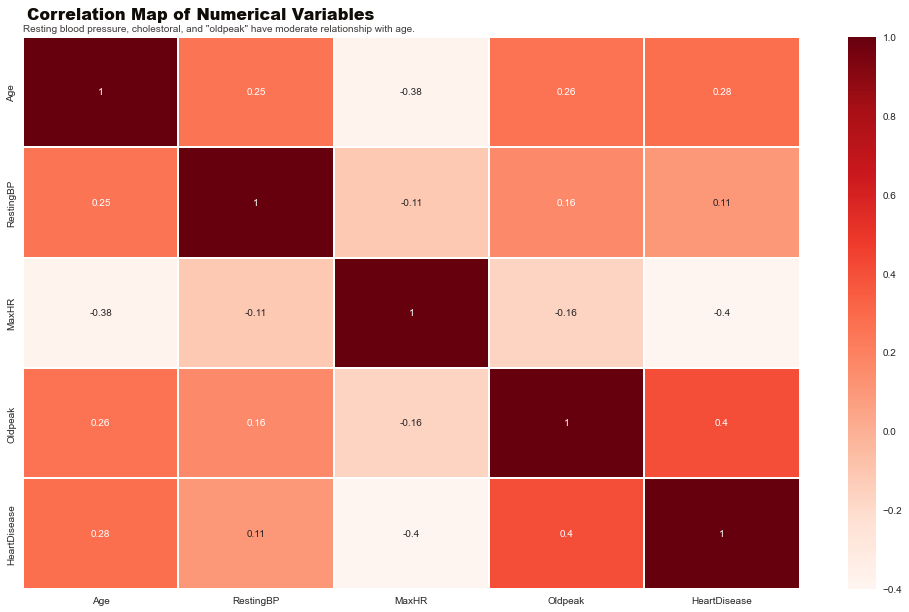

In [11]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

**7. | Dataset Pre-processing **


👉 This section will prepare the dataset before building the machine learning models

    7.1 | One-Hot Encoding 🔧

    👉 The data pre-processing will be transforming categorical variables using one-hot encoding technique.

In [12]:
# --- Creating Dummy Variables for cp, thal and slope ---

Sex = pd.get_dummies(df['Sex'], prefix='Sex')
ChestPainType = pd.get_dummies(df['ChestPainType'], prefix='ChestPainType')
RestingECG = pd.get_dummies(df['RestingECG'], prefix='RestingECG')
ST_Slope = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, Sex, ChestPainType, RestingECG, ST_Slope]
df = pd.concat(frames, axis = 1)


#I am not sure what this part is useful for-- chris


In [13]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Age,Sex,ChestPainType,RestingBP,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
40,M,ATA,140,Normal,172,0.000000,Up,0,0,1,0,1,0,0,0,1,0,0,0,1
49,F,NAP,160,Normal,156,1.000000,Flat,1,1,0,0,0,1,0,0,1,0,0,1,0
37,M,ATA,130,ST,98,0.000000,Up,0,0,1,0,1,0,0,0,0,1,0,0,1
48,F,ASY,138,Normal,108,1.500000,Flat,1,1,0,1,0,0,0,0,1,0,0,1,0
54,M,NAP,150,Normal,122,0.000000,Up,0,0,1,0,0,1,0,0,1,0,0,0,1


In [14]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['Sex', 'ChestPainType', 'RestingECG','ST_Slope'])
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Age,RestingBP,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
40,140,172,0.000000,0,0,1,0,1,0,0,0,1,0,0,0,1
49,160,156,1.000000,1,1,0,0,0,1,0,0,1,0,0,1,0
37,130,98,0.000000,0,0,1,0,1,0,0,0,0,1,0,0,1
48,138,108,1.500000,1,1,0,1,0,0,0,0,1,0,0,1,0
54,150,122,0.000000,0,0,1,0,0,1,0,0,1,0,0,0,1


In [15]:
# --- Seperating Dependent Features ---
x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

**8. Model Implementation**
Models will be tried:

8.1 logistic regression

8.2 k-NN

8.3 SVM

8.4 Gaussian Naive Bayes

8.5 Decision Trees

8.6 Random Forest

8.7 Extra Tree Classifier

8.8 Gradient Boosting

8.9 AdaBoost

8.10 Comparison

.:. Logistic Regression RunTime:  6.41240 ms .:.
.:. Logistic Regression Accuracy: 88.04% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        88
           1       0.85      0.94      0.89        96

    accuracy                           0.88       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


.: Performance Evaluation
**************************


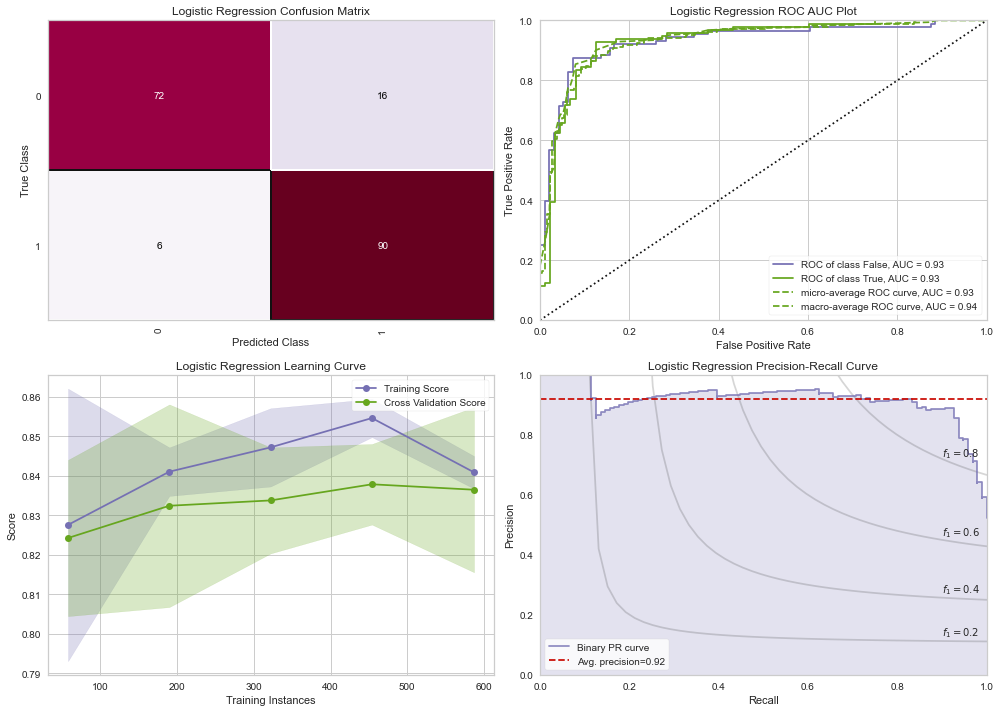

In [16]:
# --- 8.1 Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')

start = timeit.default_timer()
LRclassifier.fit(x_train, y_train)
y_pred_LR = LRclassifier.predict(x_test)
stop = timeit.default_timer()
# --- LR Runtime ---
LRTime = stop - start
print('.:. Logistic Regression RunTime: '+'\033[1m {:.5f}'.format(LRTime*1000)+' ms .:.')  
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(x_train, y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()

plt.tight_layout();

.:. K-Nearest Neighbour RunTime:  559.44630 ms .:.
.:. K-Nearest Neighbour Accuracy: 84.78% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        88
           1       0.84      0.88      0.86        96

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


.: Performance Evaluation
**************************


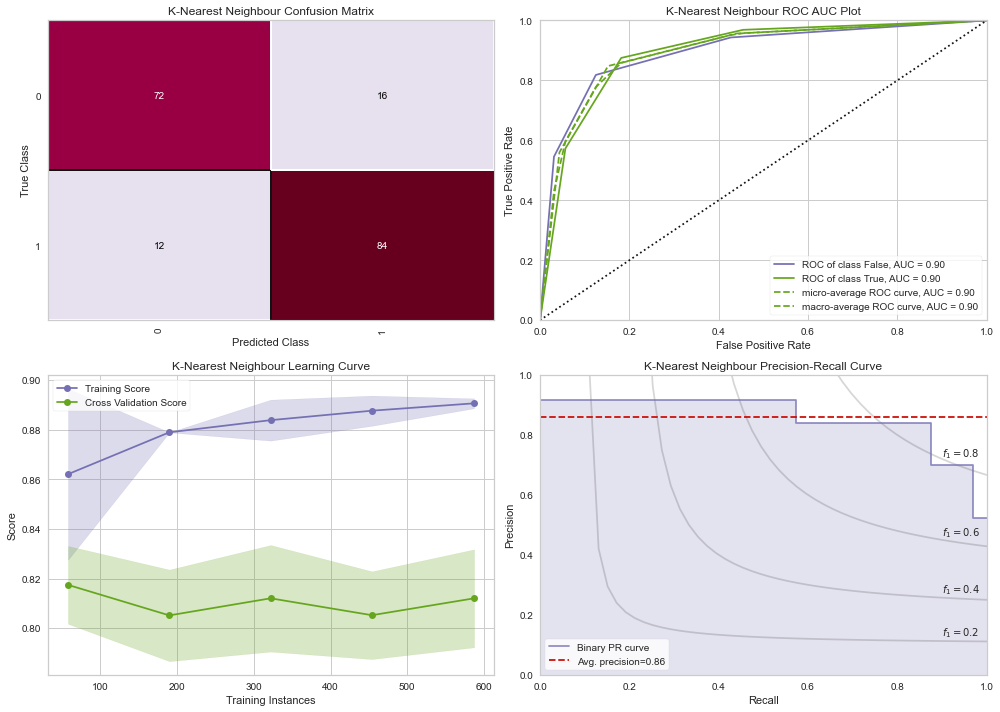

In [17]:
# --- 8.2 Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)

start = timeit.default_timer()
KNNClassifier.fit(x_train, y_train)
y_pred_KNN = KNNClassifier.predict(x_test)
stop = timeit.default_timer()
# --- KNN Runtime ---
KNNTime = stop - start
print('.:. K-Nearest Neighbour RunTime: '+'\033[1m {:.5f}'.format(KNNTime*1000)+' ms .:.')  

# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(x_train, y_train)
knncurve.score(x_test, y_test)
knncurve.finalize()

plt.tight_layout();

.:. Support Vector Machine RunTime:  230.50860 ms .:.
.:. Support Vector Machine Accuracy: 85.87% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        88
           1       0.82      0.93      0.87        96

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184


.: Performance Evaluation
**************************


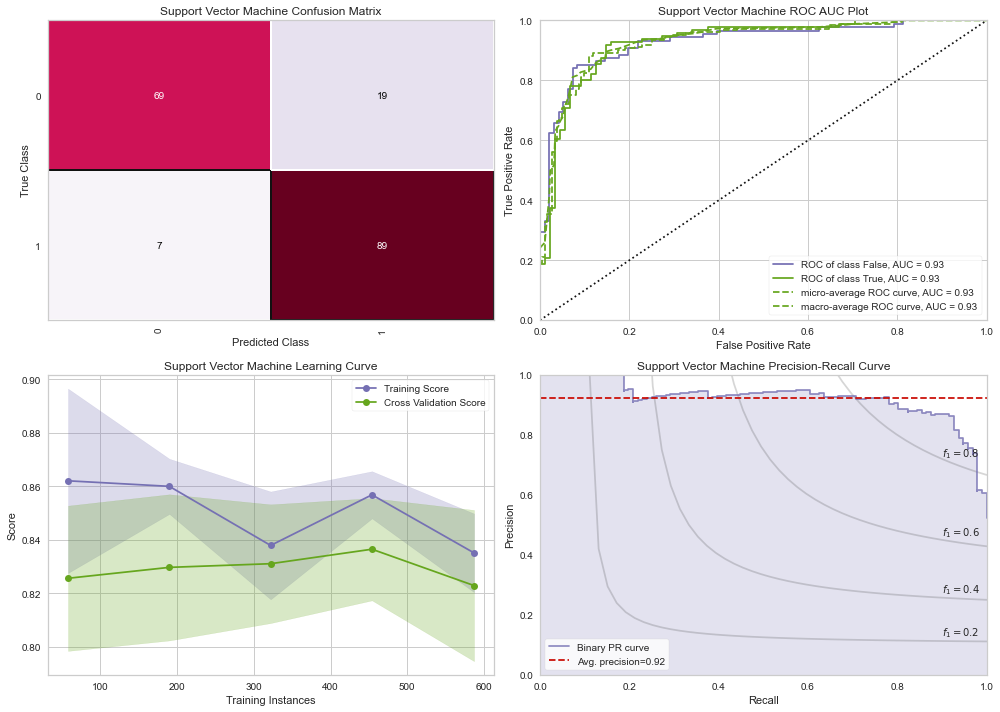

In [18]:
# --- 8.3 Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)

start = timeit.default_timer()
SVMclassifier.fit(x_train, y_train)
y_pred_SVM = SVMclassifier.predict(x_test)
stop = timeit.default_timer()
# ---SVM Runtime ---
SVMTime = stop - start
print('.:. Support Vector Machine RunTime: '+'\033[1m {:.5f}'.format(SVMTime*1000)+' ms .:.')  
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(x_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(x_train, y_train)
svmcurve.score(x_test, y_test)
svmcurve.finalize()

plt.tight_layout();

.:. Gaussian Naive Bayes RunTime:  2.49930 ms .:.
.:. Gaussian Naive Bayes Accuracy: 84.78% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.88      0.80      0.83        88
           1       0.83      0.90      0.86        96

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


.: Performance Evaluation
**************************


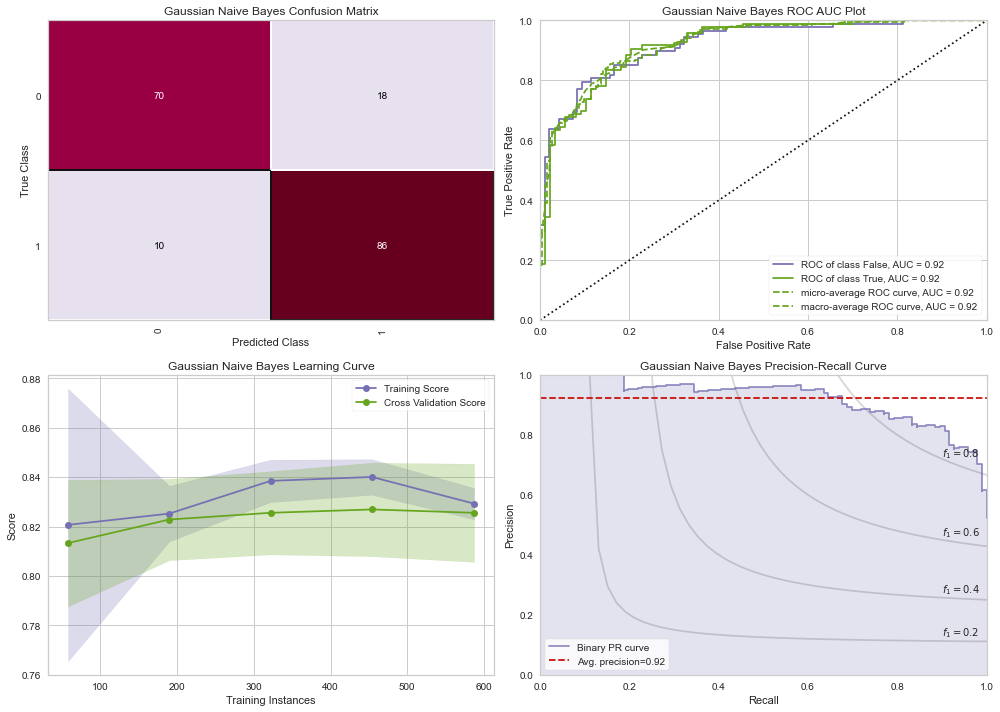

In [19]:
# ---8.4  Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)


start = timeit.default_timer()
GNBclassifier.fit(x_train, y_train)
y_pred_GNB = GNBclassifier.predict(x_test)
stop = timeit.default_timer()
# ---GNB Runtime ---
GNBTime = stop - start
print('.:. Gaussian Naive Bayes RunTime: '+'\033[1m {:.5f}'.format(GNBTime*1000)+' ms .:.')  
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='PuRd',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(x_train, y_train)
gnbmatrix.score(x_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(x_train, y_train)
gnbrocauc.score(x_test, y_test)
gnbrocauc.finalize()

# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(x_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(x_train, y_train)
gnbcurve.score(x_test, y_test)
gnbcurve.finalize()

plt.tight_layout();

.:. DTC RunTime:  3.33610 ms .:.
.:. Decision Tree Accuracy: 82.07% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        88
           1       0.81      0.85      0.83        96

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184


.: Performance Evaluation
**************************


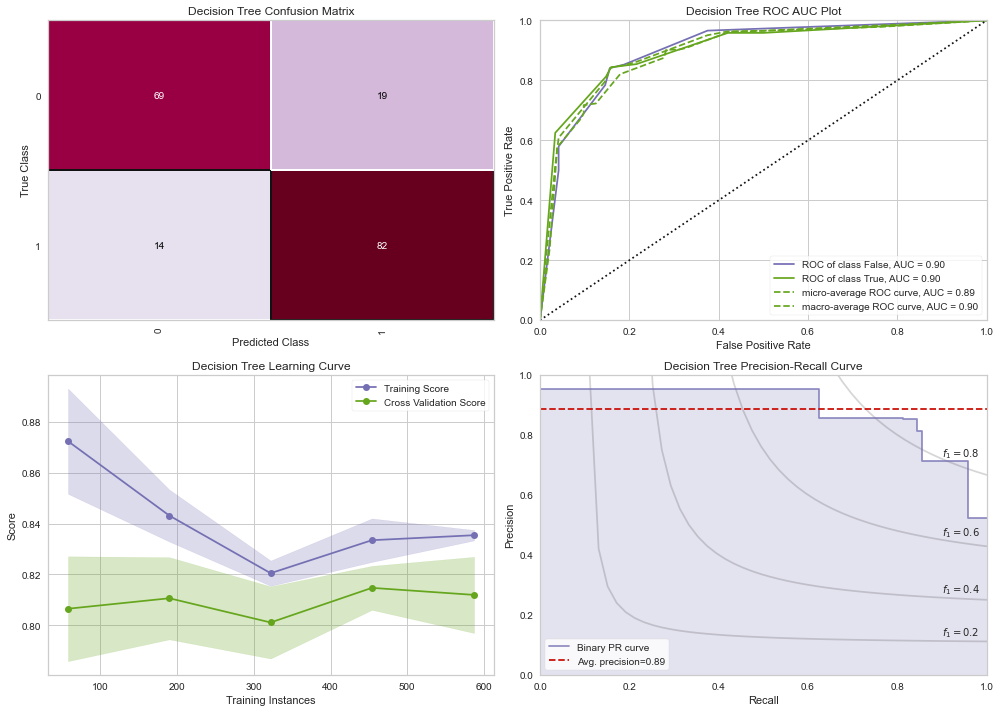

In [20]:
# --- 8.5 Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

start = timeit.default_timer()
DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)
stop = timeit.default_timer()
# ---GNB Runtime ---
DTCTime = stop - start
print('.:. DTC RunTime: '+'\033[1m {:.5f}'.format(DTCTime*1000)+' ms .:.')  
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();

In [21]:
# --- 8.6 Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)


start = timeit.default_timer()
RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)
stop = timeit.default_timer()
# ---GNB Runtime ---
RFTime = stop - start
print('.:. RF RunTime: '+'\033[1m {:.5f}'.format(RFTime*1000)+' ms .:.')  
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(x_train, y_train)
rcccurve.score(x_test, y_test)
rcccurve.finalize()

plt.tight_layout();

.:. RF RunTime:  2497.42620 ms .:.
.:. Random Forest Accuracy: 88.04% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        88
           1       0.85      0.94      0.89        96

    accuracy                           0.88       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


.: Performance Evaluation
**************************


.:. ET RunTime:  60.38610 ms .:.
.:. Extra Tree Classifier Accuracy: 85.33% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        88
           1       0.82      0.92      0.87        96

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184


.: Performance Evaluation
**************************


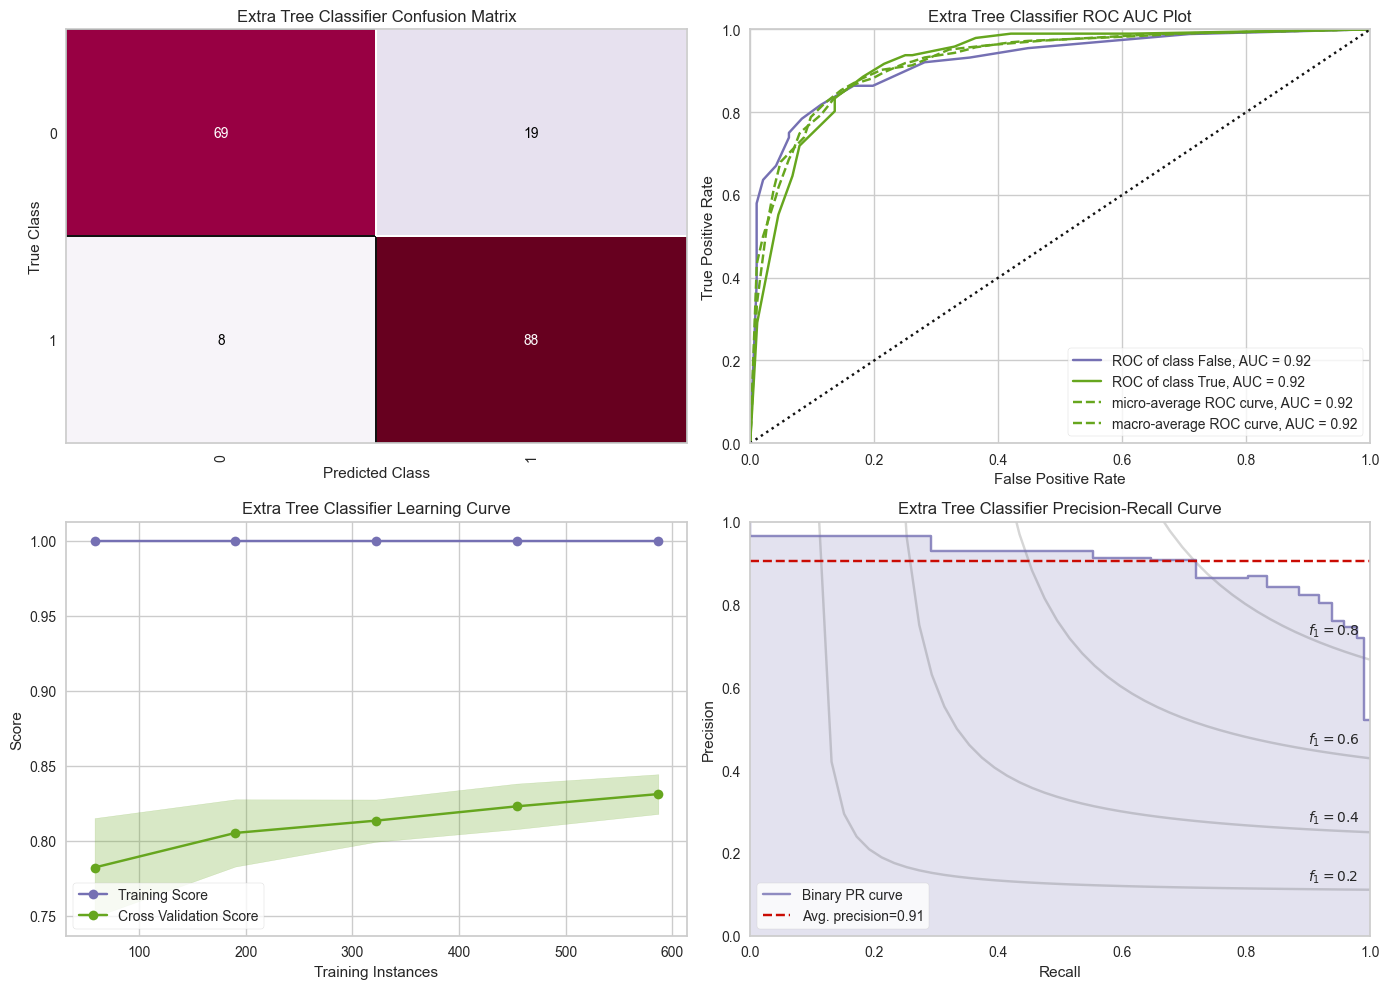

In [ ]:
# ---8.7 Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

start = timeit.default_timer()
ETclassifier.fit(x_train, y_train)
y_pred_ET = ETclassifier.predict(x_test)
stop = timeit.default_timer()
# --- Runtime ---
ETTime = stop - start
print('.:. ET RunTime: '+'\033[1m {:.5f}'.format(ETTime*1000)+' ms .:.')  

# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')

# --- ET Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_ET))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- ET Confusion Matrix ---
etcmatrix = ConfusionMatrix(ETclassifier, ax=ax1, cmap='PuRd',
                            title='Extra Tree Classifier Confusion Matrix')
etcmatrix.fit(x_train, y_train)
etcmatrix.score(x_test, y_test)
etcmatrix.finalize()

# --- ET ROC AUC ---
etrocauc = ROCAUC(ETclassifier, classes=['False', 'True'], ax=ax2,
                  title='Extra Tree Classifier ROC AUC Plot')
etrocauc.fit(x_train, y_train)
etrocauc.score(x_test, y_test)
etrocauc.finalize()

# --- ET Learning Curve ---
etlc = LearningCurve(ETclassifier, ax=ax3, title='Extra Tree Classifier Learning Curve')
etlc.fit(x_train, y_train)
etlc.finalize()

# --- ET Precision Recall Curve ---
etpc = PrecisionRecallCurve(ETclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='Extra Tree Classifier Precision-Recall Curve')
etpc.fit(x_train, y_train)
etpc.score(x_test, y_test)
etpc.finalize()

plt.tight_layout();

.:. GB RunTime:  205.81380 ms .:.
.:. Gradient Boosting Accuracy: 88.04% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        88
           1       0.85      0.94      0.89        96

    accuracy                           0.88       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


.: Performance Evaluation
**************************


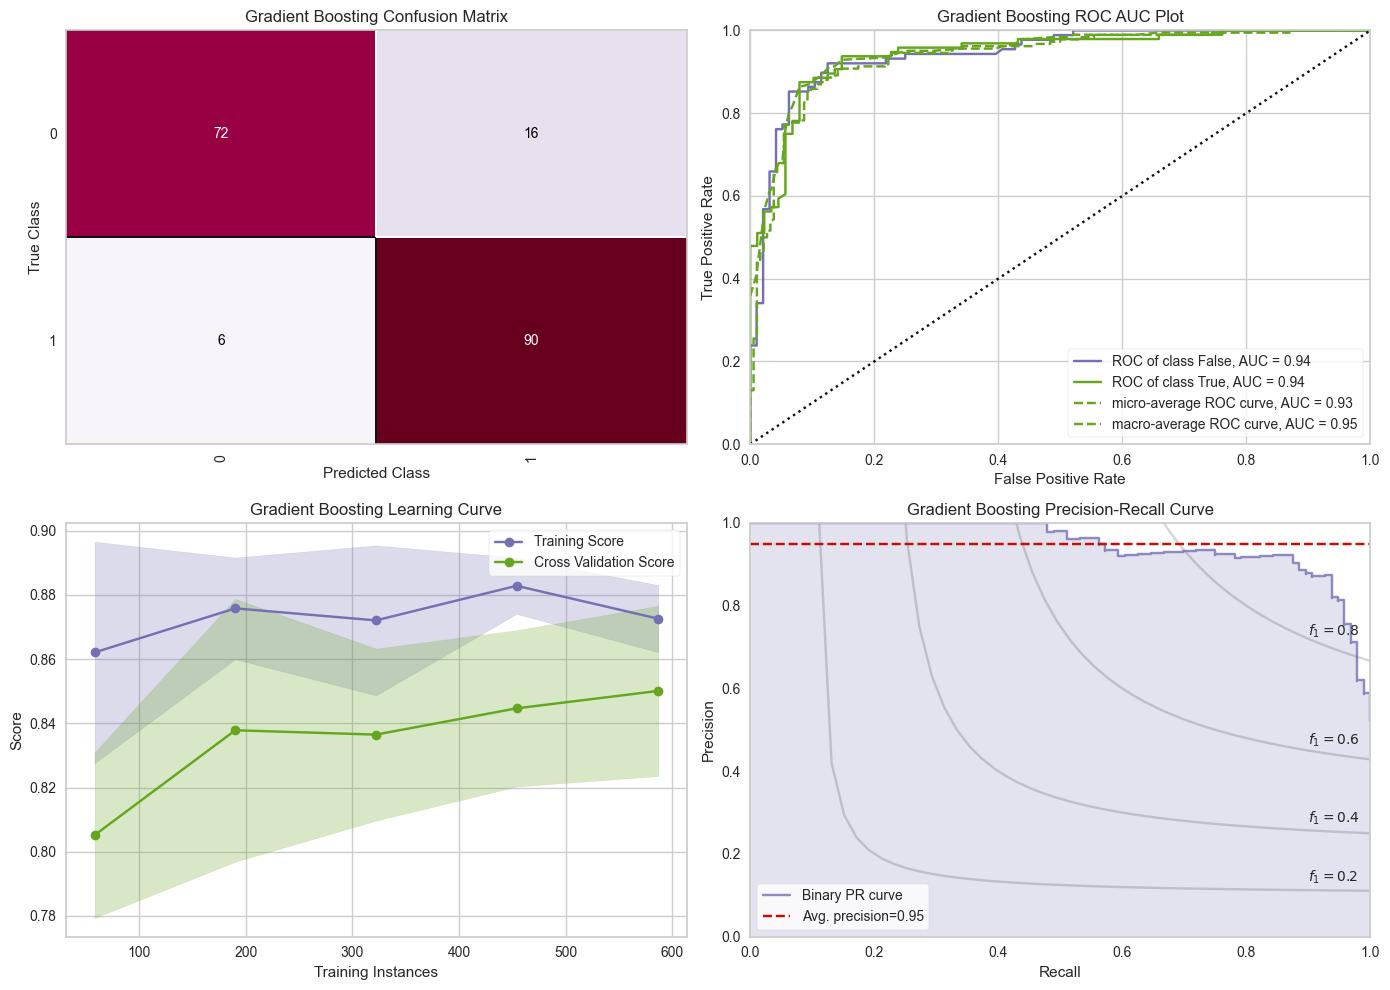

In [ ]:
# --- 8.8 Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)


start = timeit.default_timer()
GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)
stop = timeit.default_timer()
# --- Runtime ---
GBTime = stop - start
print('.:. GB RunTime: '+'\033[1m {:.5f}'.format(GBTime*1000)+' ms .:.')  
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();

.:. AB RunTime:  15.10560 ms .:.
.:. AdaBoost Accuracy: 84.24% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        88
           1       0.85      0.84      0.85        96

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


.: Performance Evaluation
**************************


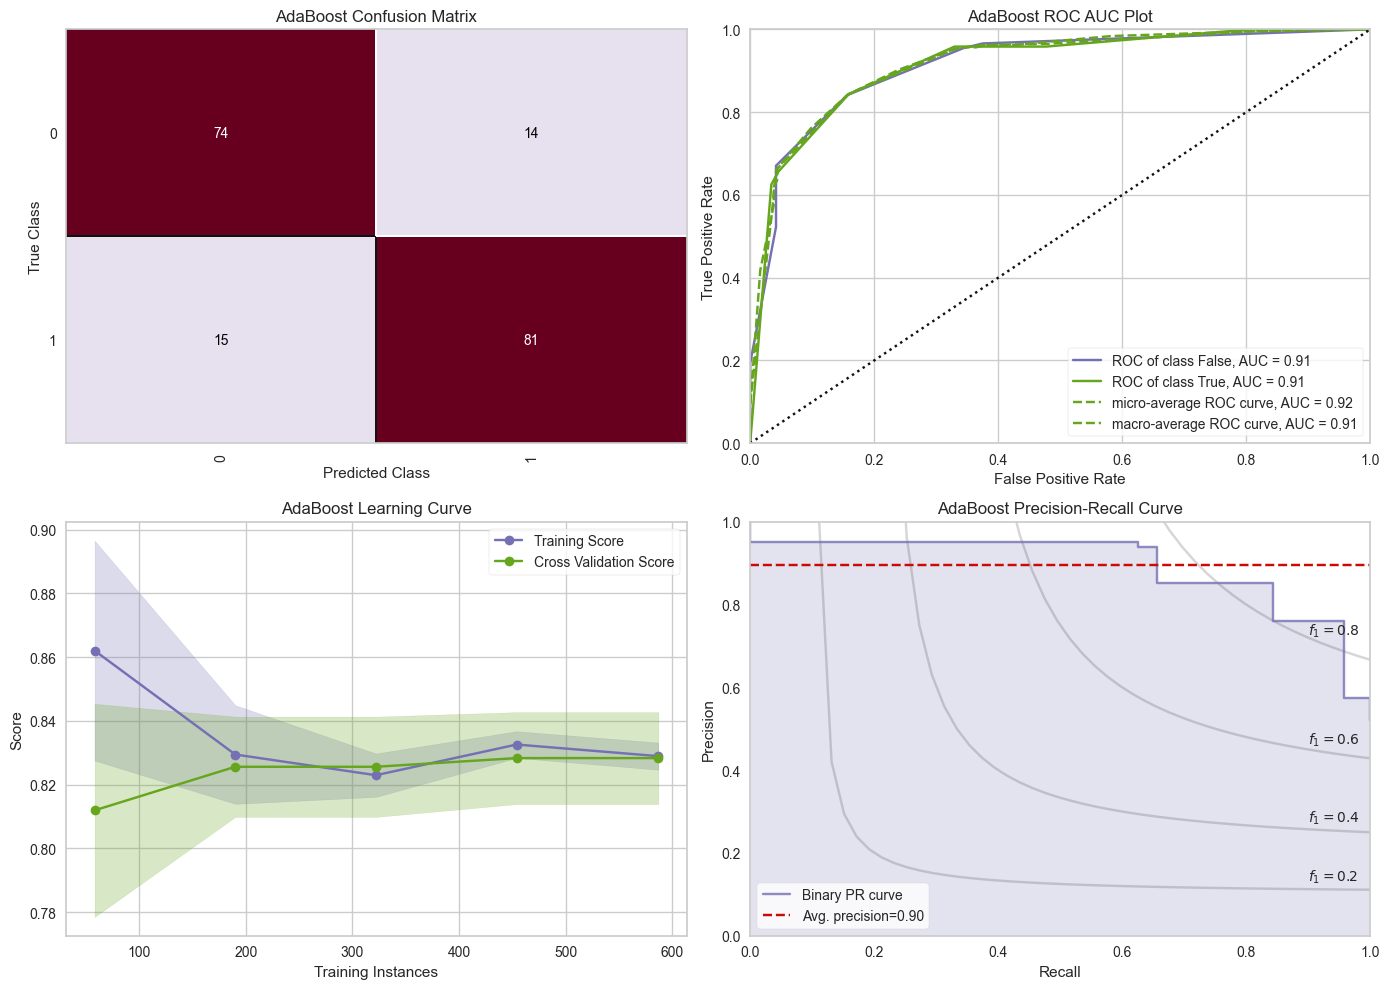

In [ ]:
# --- 8.9 Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)



start = timeit.default_timer()
ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)
stop = timeit.default_timer()
# --- Runtime ---
ABTime = stop - start
print('.:. AB RunTime: '+'\033[1m {:.5f}'.format(ABTime*1000)+' ms .:.')  
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

# --- AdaBoost ROC AUC ---
abrocauc = ROCAUC(ABclassifier, classes=['False', 'True'], ax=ax2,
                  title='AdaBoost ROC AUC Plot')
abrocauc.fit(x_train, y_train)
abrocauc.score(x_test, y_test)
abrocauc.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax3, title='AdaBoost Learning Curve')
ablc.fit(x_train, y_train)
ablc.finalize()

# --- AdaBoost Precision Recall Curve ---
abpc = PrecisionRecallCurve(ABclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='AdaBoost Precision-Recall Curve')
abpc.fit(x_train, y_train)
abpc.score(x_test, y_test)
abpc.finalize()

plt.tight_layout();

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100],
                         'Runtime (ms)': [LRTime*1000, KNNTime*1000, SVMTime*1000, GNBTime*1000, DTCTime*1000, RFTime*1000, 
                                    GBTime*1000, ABTime*1000, ETTime*1000]})


# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy,Runtime (ms)
Logistic Regression,88.043478,6.258200
Random Forest,88.043478,3085.404300
Gradient Boosting,88.043478,205.813800
Support Vector Machine,85.869565,128.128400
Extra Tree Classifier,85.326087,60.386100
K-Nearest Neighbour,84.782609,38.211200
Gaussian Naive Bayes,84.782609,3.431500
AdaBoost,84.239130,15.105600
Decision Tree,82.065217,3.080700
